In [2]:
# video tutorial at https://www.youtube.com/watch?v=1O_BenficgE

In [ ]:
#!pip install yfinance

In [1]:
#!pip uninstall -y yfinance

In [36]:
import yfinance as yf

In [37]:
sp500 = yf.Ticker("^GSPC")

In [38]:
sp500 = sp500.history(period = "max")

In [39]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-08-01 00:00:00-04:00,4578.830078,4584.620117,4567.529785,4576.729980,4042370000,0.0,0.0
2023-08-02 00:00:00-04:00,4550.930176,4550.930176,4505.750000,4513.390137,4270710000,0.0,0.0
2023-08-03 00:00:00-04:00,4494.270020,4519.490234,4485.540039,4501.890137,4149120000,0.0,0.0


In [40]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-07-25 00:00:00-04:00', '2023-07-26 00:00:00-04:00',
               '2023-07-27 00:00:00-04:00', '2023-07-28 00:00:00-04:00',
               '2023-07-31 00:00:00-04:00', '2023-08-01 00:00:00-04:00',
               '2023-08-02 00:00:00-04:00', '2023-08-03 00:00:00-04:00',
               '2023-08-04 00:00:00-04:00', '2023-08-07 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24014, freq=None)

<Axes: xlabel='Date'>

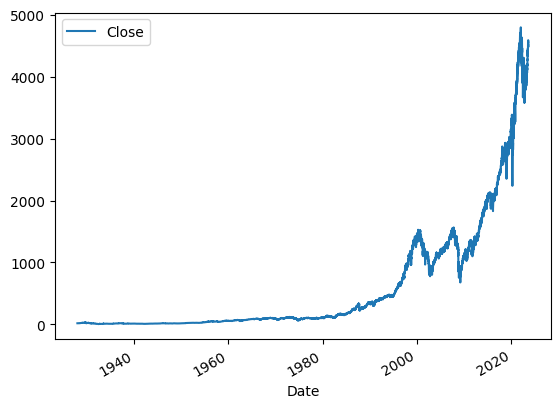

In [41]:
sp500.plot.line(y = 'Close', use_index = True)

In [42]:
del sp500['Dividends']
del sp500['Stock Splits']

In [43]:
# Create a column 'Tomorrow' - the 'Close' price of tomorrow:
sp500['Tomorrow'] = sp500['Close'].shift(-1)

In [44]:
# sp500

In [45]:
# our 'Target' to predict is whether 'Tomorrow' price is greater than today's 'Close' price
sp500['Target'] = (sp500['Tomorrow'] > sp500['Close']).astype(int)

In [46]:
# sp500

In [47]:
# Remove too old data (before 1990)
sp500 = sp500.loc['1990-01-01':].copy()

In [13]:
 sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2023-08-01 00:00:00-04:00,4578.830078,4584.620117,4567.529785,4576.729980,4042370000,4513.390137,0
2023-08-02 00:00:00-04:00,4550.930176,4550.930176,4505.750000,4513.390137,4270710000,4501.890137,0
2023-08-03 00:00:00-04:00,4494.270020,4519.490234,4485.540039,4501.890137,4149120000,4478.029785,0


In [48]:
# Training the model:

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, min_samples_split = 100, random_state = 1)
# n_estimators - the higher the better accuracy
# min_samples_split - the higher the less accurate model, but the less overfitted

# simple split of the data into training and testing subsets:
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ['Open', 'High', 'Low', 'Close', 'Volume']
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [49]:
# use the model to create predictions:
preds = model.predict(test[predictors])

In [50]:
import pandas as pd

preds = pd.Series(preds, index = test.index)

In [51]:
preds

Date
2023-03-15 00:00:00-04:00    0
2023-03-16 00:00:00-04:00    1
2023-03-17 00:00:00-04:00    0
2023-03-20 00:00:00-04:00    0
2023-03-21 00:00:00-04:00    0
                            ..
2023-08-01 00:00:00-04:00    1
2023-08-02 00:00:00-04:00    1
2023-08-03 00:00:00-04:00    1
2023-08-04 00:00:00-04:00    1
2023-08-07 00:00:00-04:00    0
Length: 100, dtype: int64

In [52]:
# Measure the precision of our model:
from sklearn.metrics import precision_score

precision_score(test['Target'], preds)

0.6153846153846154

<Axes: xlabel='Date'>

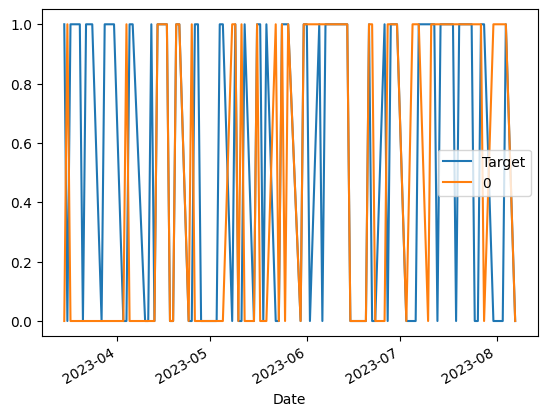

In [53]:
# let's plot our predictions and actual value of 'Target':
combined = pd.concat([test['Target'], preds], axis = 1)
combined.plot()

In [54]:
# Bakctesting our model !!

# Create a prediction function:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index = test.index, name = 'Predictions')
    combined = pd.concat([test['Target'], preds], axis = 1)
    return combined

In [55]:
# backtesting function:
# by default, start is 2500 (10 years), step = 250 (working days in a year)
def backtest(data, model, predictors, start = 2500, step = 250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [56]:
# Finally, use our backtesting on the historical data:

predictions = backtest(sp500, model, predictors)

In [57]:
# Evaluate our predictions:

predictions['Predictions'].value_counts()

Predictions
0    3410
1    2554
Name: count, dtype: int64

In [58]:
# the precision of our algorythm:
precision_score(predictions['Target'], predictions['Predictions'])

0.5246671887235709

In [59]:
# our precision is WORSE than sp500 itself:
predictions['Target'].value_counts() / predictions.shape[0]

Target
1    0.534038
0    0.465962
Name: count, dtype: float64

# Improve our model by adding Moving Averages and Trends

In [60]:
# Adding more predictors to our model to increase the precision !!d
# We will use different Moving Averages (Rolling Means)

horizons = [2, 5, 60, 250, 1000]  # number of days (MA periods)
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f'Close_ratio_{horizon}'
    sp500[ratio_column] = sp500['Close'] / rolling_averages['Close']
    
    # trend_column - how many times the stock went up in the prior days
    trend_column = f'Trend_{horizon}'
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()['Target']

    new_predictors += [ratio_column, trend_column]

In [61]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_ratio_2,Trend_2,Close_ratio_5,Trend_5,Close_ratio_60,Trend_60,Close_ratio_250,Trend_250,Close_ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01 00:00:00-04:00,4578.830078,4584.620117,4567.529785,4576.729980,4042370000,4513.390137,0,0.998666,1.0,1.001381,2.0,1.053060,36.0,1.127839,121.0,1.196973,536.0
2023-08-02 00:00:00-04:00,4550.930176,4550.930176,4505.750000,4513.390137,4270710000,4501.890137,0,0.993032,0.0,0.989834,2.0,1.036986,35.0,1.111837,120.0,1.179904,536.0
2023-08-03 00:00:00-04:00,4494.270020,4519.490234,4485.540039,4501.890137,4149120000,4478.029785,0,0.998724,0.0,0.988853,2.0,1.032905,34.0,1.108622,120.0,1.176413,535.0


In [63]:
sp500 = sp500.dropna()

In [64]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_ratio_2,Trend_2,Close_ratio_5,Trend_5,Close_ratio_60,Trend_60,Close_ratio_250,Trend_250,Close_ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-31 00:00:00-04:00,4584.819824,4594.220215,4573.140137,4588.959961,4503600000,4576.729980,0,1.000734,2.0,1.004465,3.0,1.057966,36.0,1.131394,121.0,1.200692,536.0
2023-08-01 00:00:00-04:00,4578.830078,4584.620117,4567.529785,4576.729980,4042370000,4513.390137,0,0.998666,1.0,1.001381,2.0,1.053060,36.0,1.127839,121.0,1.196973,536.0
2023-08-02 00:00:00-04:00,4550.930176,4550.930176,4505.750000,4513.390137,4270710000,4501.890137,0,0.993032,0.0,0.989834,2.0,1.036986,35.0,1.111837,120.0,1.179904,536.0


In [29]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

In [30]:
predictions = backtest(sp500, model, new_predictors)

In [31]:
predictions['Predictions'].value_counts()

Predictions
1    3695
0    1267
Name: count, dtype: int64

In [32]:
precision_score(predictions['Target'], predictions['Predictions'])

# in 55% our model, based on Trends and Moving Averages, predicted correct.
# !!! This success ratio is better than the actual growth of SP500  (53.4%)

0.5515561569688768

# Improve the model by changing parameters and increasing the probability of stock growth to 60%

In [65]:
# Let's further improve our model:
# increase n_estimators and decrease min_samples_split:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [77]:
# We'll rewrite the predict function to improve it:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict_proba(test[predictors])[:,1]  
                    # predict_proba() returns probability [0;1]
                    # predict()  returns 1 or 0
    preds[preds >= .6] = 1   # by default the value is 50% chance,
    preds[preds < .6] = 0    # here we increase it to 60%
    preds = pd.Series(preds, index = test.index, name = 'Predictions')
    combined = pd.concat([test['Target'], preds], axis = 1)
    return combined

In [78]:
predictions = backtest(sp500, model, new_predictors)

In [79]:
predictions['Predictions'].value_counts()

# We have much less predictions (819), but this should increase the precision of our model

Predictions
0.0    4144
1.0     819
Name: count, dtype: int64

In [80]:
precision_score(predictions['Target'], predictions['Predictions'])

0.568986568986569

In [72]:
# There is increase from 55% to 57%, thus, we improved our model!!